
Mini Project: Advanced Statistical A.

Last Updated: June 26th, 2025

Mini-project: Advanced Statistical Analysis of Apple Inc. Stock Data


👩‍🏫 👩🏿‍🏫 What You’ll learn

    Master statistical analysis of financial data using NumPy and SciPy.
    Learn effective data visualization techniques with Matplotlib for financial trends.
    Apply hypothesis testing to financial datasets for meaningful insights.
    Understand and utilize advanced statistical techniques in NumPy and SciPy.


Project Description

Using the AAPL (Apple Inc.) stock dataset, conduct the following analyses:


Initial Data Exploration

    Load the dataset using Pandas. Check for null values and understand data types.
    Examine the time series properties of the data (e.g., frequency, trends).


Data Visualization

    Utilize Matplotlib to plot closing prices and traded volume over time.
    Create a candlestick chart to depict high and low prices.


Statistical Analysis

    Compute summary statistics (mean, median, standard deviation) for key columns.
    Analyze closing prices with a moving average.


Hypothesis Testing

    Execute a t-test to compare average closing prices across different years.
    Examine daily returns’ distribution and test for normality using SciPy.


Advanced Statistical Techniques (Bonus)

    Statistical Functions in NumPy: Employ NumPy’s statistical functions for in-depth stock data analysis.
        E.g., Use convolve for moving averages, or np.corrcoef to explore correlations between financial metrics.
        Analyze correlations between moving averages of closing prices and trading volume across time periods.


Resources

    Dataset: download it here Apple Stock Prices From 1981 to 2023

It may include data such as date, opening price, closing price, high and low prices, and trading volume.

This information can be used to study trends and patterns in the stock market and make informed investment decisions.

    Date: Represents the date of the stock price.
    Open: Represents the opening stock price on that date.
    High: Represents the highest stock price on that date.
    Low: Represents the lowest stock price on that date.
    Close: Represents the closing stock price on that date.
    Adj close: Represents the adjusted closing stock price on that date (taking into account corporate actions such as splits).
    Volume: Represents the number of shares traded on that date.


Project Submission

Submit a Jupyter Notebook with :

    All analysis code and visualizations.
    Detailed explanations of findings at each step.
    A comprehensive summary of insights, focusing on advanced statistical analysis.
    A ‘Reflection’ section detailing challenges and solutions.

Suggested structure:


1. Data Loading and Exploration
2. Data Visualization
3. Statistical Analysis
4. Hypothesis Testing
5. Advanced Statistical Techniques (Bonus)
    - Signal Processing using SciPy
    - Statistical Functions in NumPy
6. Summary and Insights
7. Reflection


Guidance

    Experiment with different filters and parameters in signal processing techniques.
    Thoroughly understand each statistical function and its insights on the stock data.


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
from scipy import stats
from numpy import convolve
from skimpy import skim
import ipywidgets as widgets
from IPython.display import display, clear_output
from scipy.stats import norm

In [6]:
df = pd.read_csv('Apple Stock Prices (1981 to 2023).csv', encoding='ISO-8859-1')

# Aperçu initial
print(df.head())
print(df.info())

# Vérifier les valeurs manquantes
print('\nValeurs manquantes par colonne :')
print(df.isnull().sum())

# Vérifier le nombre de doublons
print('\nNombre de doublons :', df.duplicated().sum())

# Supprimer les doublons
df.drop_duplicates(inplace=True)
print('\nDoublons supprimés.')

# Aperçu après nettoyage
print('\nInfo après nettoyage :')
print(df.info())

         Date      Open      High       Low     Close  Adj Close    Volume
0  02/01/1981  0.154018  0.155134  0.154018  0.154018   0.119849  21660800
1  05/01/1981  0.151228  0.151228  0.150670  0.150670   0.117244  35728000
2  06/01/1981  0.144531  0.144531  0.143973  0.143973   0.112032  45158400
3  07/01/1981  0.138393  0.138393  0.137835  0.137835   0.107256  55686400
4  08/01/1981  0.135603  0.135603  0.135045  0.135045   0.105085  39827200
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10608 entries, 0 to 10607
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10608 non-null  object 
 1   Open       10608 non-null  float64
 2   High       10608 non-null  float64
 3   Low        10608 non-null  float64
 4   Close      10608 non-null  float64
 5   Adj Close  10608 non-null  float64
 6   Volume     10608 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 580.3+ KB
None

Valeurs manq

In [7]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 10608  │ │ float64     │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column   ┃ NA ┃ NA % ┃ mean     ┃ sd       ┃ p0      ┃ p25      ┃ p50      ┃ p75       ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Open     │  0 │    0 │    16.69 │    35.45 │ 0.04967 │   0.2879 │   0.4888 │     16.32 │    182.6 │   ▇▁   │  │
│ │ High     │  0 │    0 │    16.88 │    35.88 │ 0.04967 │   0.2969 │   0.4955 │     16.42 │    182.9 │   ▇▁   │  │
│ │ Low      │  0 │    0 │     16.5 │    35.03 │ 0.04911 │   0.2824 │   0.4804 │     16.15 │    179.1 │   ▇▁   │  │
│ │ Close    │  0 │    0 │     16.7 │    35.47 │ 0.04911 │   0.2889 │   0.4877 │     16.27 │      182 │   ▇▁   │  │
│ │ Adj      │  0 │    0 │    16.03 │    35.15 │ 0.03821 │   0.2389 │   0.4049 │     14.07 │      181 │   ▇▁   │  │
│ │ Close    │    │      │          │          │         │          │          │           │          │        │  │
│ │ Volume   │  0 │    0 │ 32750000 │ 33780000 │       0 │ 12130000 │ 21460000 │ 406700000 │ 74220000 │   ▇    │  │
│ │          │    │      │        0 │        0 │         │        0 │        0 │           │       00 │        │  │
│ └──────────┴────┴──────┴──────────┴──────────┴─────────┴──────────┴──────────┴───────────┴──────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃        ┃    ┃      ┃            ┃            ┃           ┃            ┃ chars per ┃ words per  ┃ total     ┃  │
│ ┃ column ┃ NA ┃ NA % ┃ shortest   ┃ longest    ┃ min       ┃ max        ┃ row       ┃ row        ┃ words     ┃  │
│ ┡━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ Date   │  0 │    0 │ 02/01/1981 │ 02/01/1981 │ 01/02/198 │ 31/12/2021 │        10 │          1 │     10608 │  │
│ │        │    │      │            │            │ 2         │            │           │            │           │  │
│ └────────┴────┴──────┴────────────┴────────────┴───────────┴────────────┴───────────┴────────────┴───────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [8]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
date_deltas = df.index.to_series().diff()
print("Examen de la fréquence des observations :")
print(date_deltas.value_counts())

Examen de la fréquence des observations :
1.0    10607
Name: count, dtype: int64


In [9]:
print(df['Date'].dtype)
print(df['Date'].head())
print(df['Date'].isna().sum())

datetime64[ns]
0   1981-01-02
1   1981-01-05
2   1981-01-06
3   1981-01-07
4   1981-01-08
Name: Date, dtype: datetime64[ns]
0


In [10]:
df.set_index('Date', inplace=True)
print(f"Période couverte : {df.index.min()} --> {df.index.max()}")
df['MA_30'] = df['Close'].rolling(window=30).mean()
df['MA_120'] = df['Close'].rolling(window=120).mean()

Période couverte : 1981-01-02 00:00:00 --> 2023-01-27 00:00:00


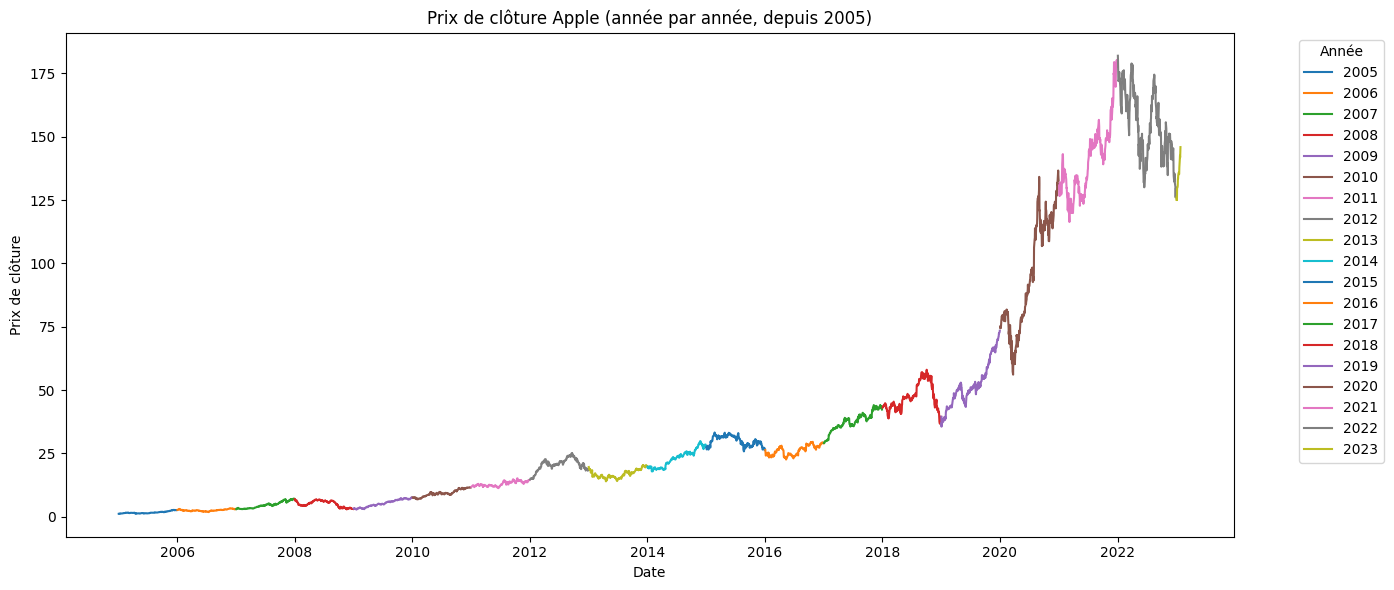

In [11]:

plt.figure(figsize=(14, 6))
years = range(2005, df.index.year.max() + 1)

for year in years:
    yearly_data = df[df.index.year == year]
    if not yearly_data.empty:
        plt.plot(yearly_data.index, yearly_data['Close'], label=str(year))

plt.title("Prix de clôture Apple (année par année, depuis 2005)")
plt.xlabel("Date")
plt.ylabel("Prix de clôture")
plt.legend(title="Année", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [12]:
options = ['Close', 'MA_30', 'MA_120']
checkboxes = [widgets.Checkbox(value=True, description=opt) for opt in options]
""" df_filtered = df[df.index >= '2005'] """
""" years = sorted(df.loc[df.index >= '2005'].index.year.unique()) """
all_years = sorted(df.index.year.unique())

range_slider = widgets.SelectionRangeSlider(
    options=all_years,
    index=(all_years.index(2005), len(all_years)-1),
    description='Années',
    continuous_update=False
)

output = widgets.Output()


def update_plot(change=None):
    with output:
        clear_output(wait=True)

        start, end = range_slider.value
        df_filtered = df[(df.index.year >= start) & (df.index.year <= end)]

        fig, ax = plt.subplots(figsize=(12, 5), facecolor='white')
        ax.set_facecolor('white')

        plotted = False
        for cb, col in zip(checkboxes, options):
            if cb.value and col in df_filtered.columns:
                ax.plot(df_filtered.index, df_filtered[col], label=col)
                plotted = True

        if plotted:
            ax.set_title(f"Prix de clôture ({start} → {end})")
            ax.set_xlabel("Date")
            ax.set_ylabel("Prix")
            ax.legend()
        else:
            ax.set_frame_on(False)
            ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
            ax.text(0.5, 0.5, 'Aucune série sélectionnée',
                    ha='center', va='center', fontsize=14, transform=ax.transAxes)

        plt.tight_layout()
        plt.show()

range_slider.observe(update_plot, names='value')
for cb in checkboxes:
    cb.observe(update_plot, names='value')

controls = widgets.VBox([widgets.HBox(checkboxes), range_slider])
display(controls, output)
update_plot()

Output()

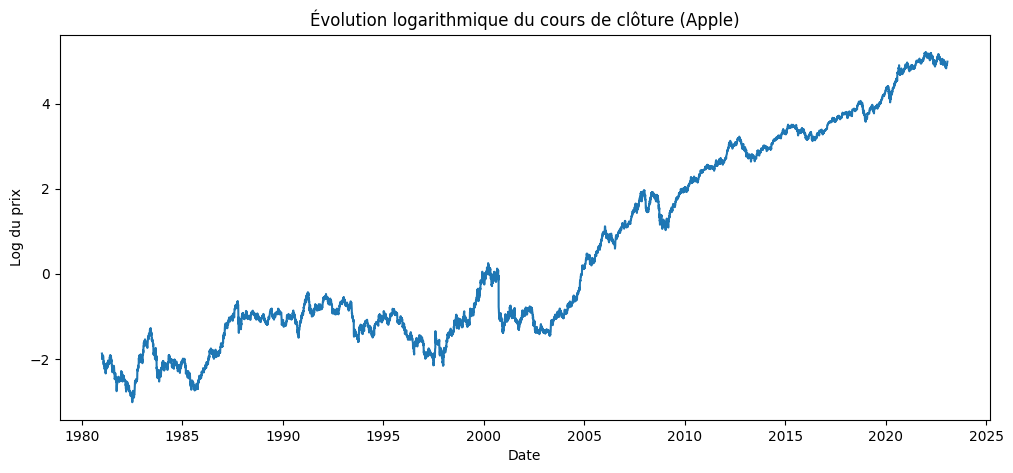

In [13]:
df['LogClose'] = np.log(df['Close'])

plt.figure(figsize=(12,5))
plt.plot(df['LogClose'])
plt.title("Évolution logarithmique du cours de clôture (Apple)")
plt.xlabel("Date")
plt.ylabel("Log du prix")
plt.show()

In [14]:
# Colonnes à utiliser
df['Volume_MA_30'] = df['Volume'].rolling(window=30).mean()

# Liste des années disponibles
all_years = sorted(df.index.year.unique())

# Slider de plage
range_slider = widgets.SelectionRangeSlider(
    options=all_years,
    index=(all_years.index(2005), len(all_years) - 1),
    description='Années',
    continuous_update=False
)

# Zone d'affichage
output = widgets.Output()

def update_graphs(change=None):
    with output:
        clear_output(wait=True)
        
        # Plage temporelle sélectionnée
        start, end = range_slider.value
        df_filtered = df[(df.index.year >= start) & (df.index.year <= end)]

        # === Graphique 1 : Prix vs Volume ===
        fig, ax1 = plt.subplots(figsize=(12, 5))
        ax1.plot(df_filtered.index, df_filtered['Close'], color='blue', label='Clôture')
        ax1.set_ylabel('Prix', color='blue')
        ax1.tick_params(axis='y', labelcolor='blue')

        ax2 = ax1.twinx()
        ax2.plot(df_filtered.index, df_filtered['Volume'], color='red', alpha=0.3, label='Volume')
        ax2.set_ylabel('Volume échangé', color='red')
        ax2.tick_params(axis='y', labelcolor='red')

        plt.title(f"Prix de clôture vs Volume ({start} → {end})")
        plt.tight_layout()
        plt.show()

        # === Graphique 2 : Volume moyen mobile ===
        plt.figure(figsize=(12, 4))
        plt.plot(df_filtered.index, df_filtered['Volume_MA_30'], color='darkred')
        plt.title(f"Moyenne mobile (30 jours) du volume ({start} → {end})")
        plt.xlabel("Date")
        plt.ylabel("Volume")
        plt.tight_layout()
        plt.show()

        # === Heatmap de corrélation ===
        corr = df_filtered[['Close', 'Volume']].dropna().corr()
        plt.figure(figsize=(4, 3))
        sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
        plt.title("Corrélation Close / Volume")
        plt.tight_layout()
        plt.show()

# Lier le slider
range_slider.observe(update_graphs, names='value')

# Affichage
display(range_slider, output)
update_graphs()

SelectionRangeSlider(continuous_update=False, description='Années', index=(24, 42), options=(1981, 1982, 1983,…

Output()

<Axes: title={'center': 'Rendements journaliers'}, xlabel='Date'>

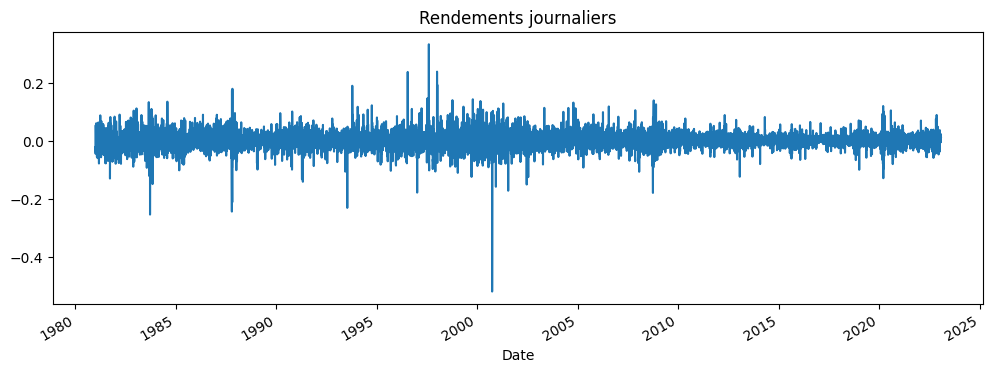

In [15]:
df['Return'] = df['Close'].pct_change()
df['Return'].plot(figsize=(12, 4), title="Rendements journaliers")


Text(0.5, 1.0, 'Rendements journaliers')

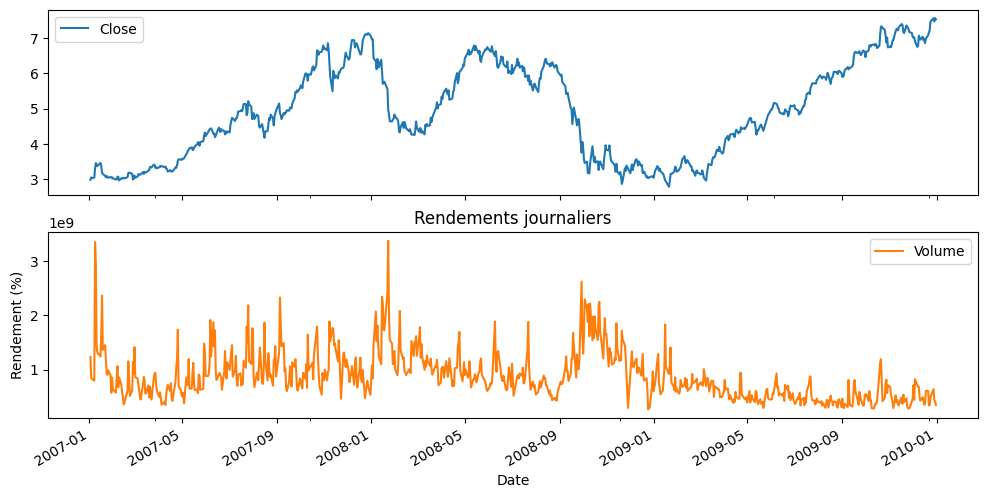

In [16]:
df_zoom = df['2007':'2009']
df_zoom[['Close', 'Volume']].plot(subplots=True, figsize=(12,6))
plt.ylabel("Rendement (%)")
plt.title("Rendements journaliers")

Text(0.5, 1.0, 'Rendements journaliers')

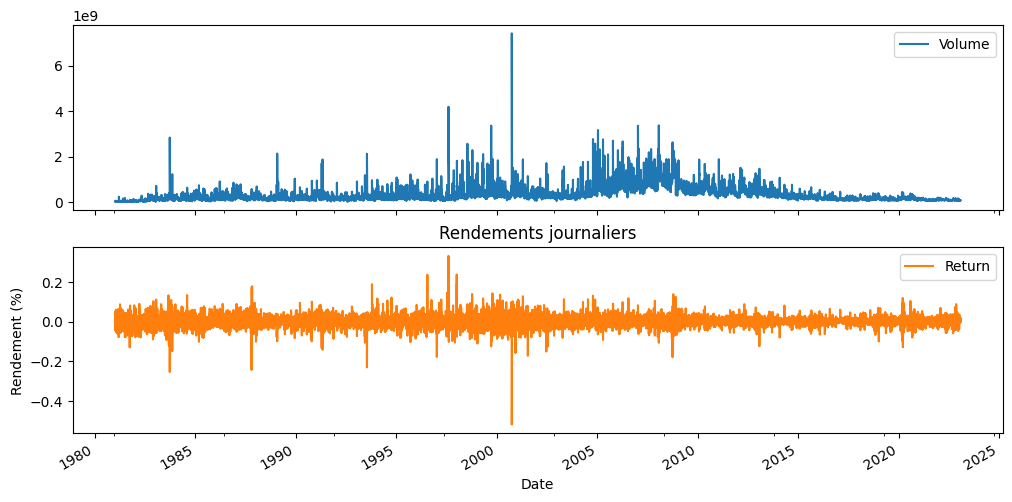

In [17]:
# Vérifie les valeurs de rendement
df['Return'].describe()

# Cherche les rendements extrêmes
df[df['Return'].abs() > 0.1]  # Plus de 10% de variation en un jour

# Affiche volume et return ensemble
df[['Volume', 'Return']].plot(subplots=True, figsize=(12,6))
plt.ylabel("Rendement (%)")
plt.title("Rendements journaliers")

In [18]:
returns = df['Return'].dropna()
shapiro_stat, p_val = stats.shapiro(returns.sample(5000) if len(returns) > 5000 else returns)
print(f"Shapiro-Wilk : stat={shapiro_stat:.3f}, p-value={p_val:.4f}")

Shapiro-Wilk : stat=0.888, p-value=0.0000


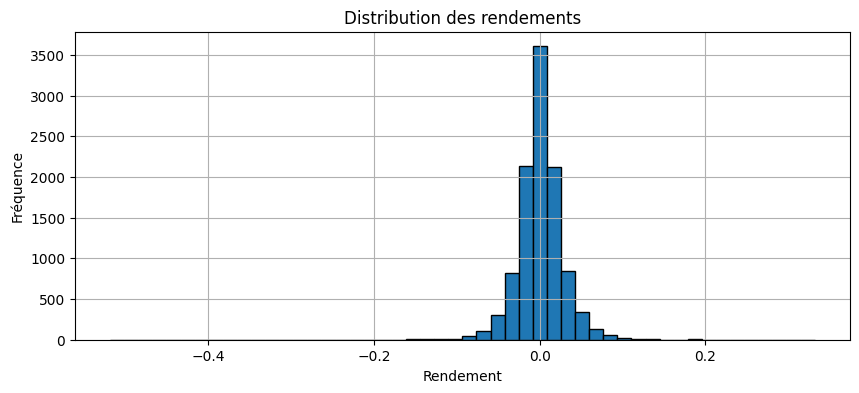

In [19]:
df['Return'].hist(bins=50, figsize=(10,4), edgecolor='black')
plt.title("Distribution des rendements")
plt.xlabel("Rendement")
plt.ylabel("Fréquence")
plt.show()

In [20]:
print(df['Return'].sort_values().head(5))   # Pires jours
print(df['Return'].sort_values(ascending=False).head(5))  # Meilleurs jours

Date
2000-09-29   -0.518692
1983-09-23   -0.253844
1987-10-19   -0.243524
1993-07-16   -0.230767
1987-10-26   -0.211267
Name: Return, dtype: float64
Date
1997-08-06    0.332280
1998-01-02    0.238088
1996-07-18    0.237035
1998-01-06    0.192915
1993-10-15    0.189471
Name: Return, dtype: float64


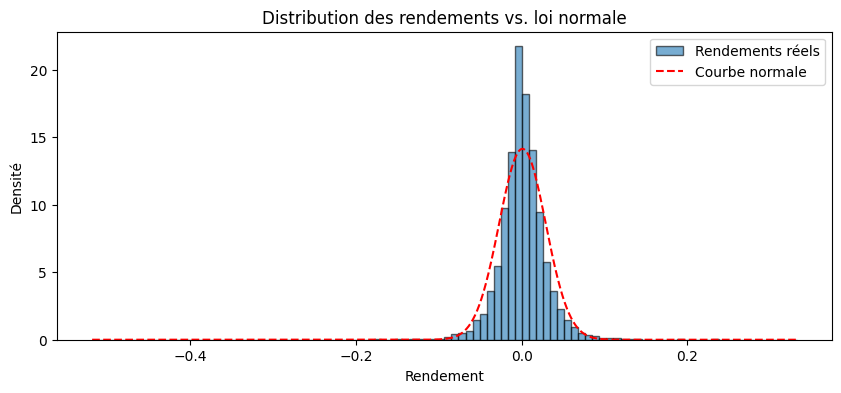

In [21]:

returns = df['Return'].dropna()
mu, sigma = returns.mean(), returns.std()

# Histogramme
plt.figure(figsize=(10,4))
plt.hist(returns, bins=100, density=True, alpha=0.6, edgecolor='black', label='Rendements réels')

# Courbe normale
x = np.linspace(returns.min(), returns.max(), 1000)
plt.plot(x, norm.pdf(x, mu, sigma), 'r--', label='Courbe normale')

plt.title("Distribution des rendements vs. loi normale")
plt.xlabel("Rendement")
plt.ylabel("Densité")
plt.legend()
plt.show()

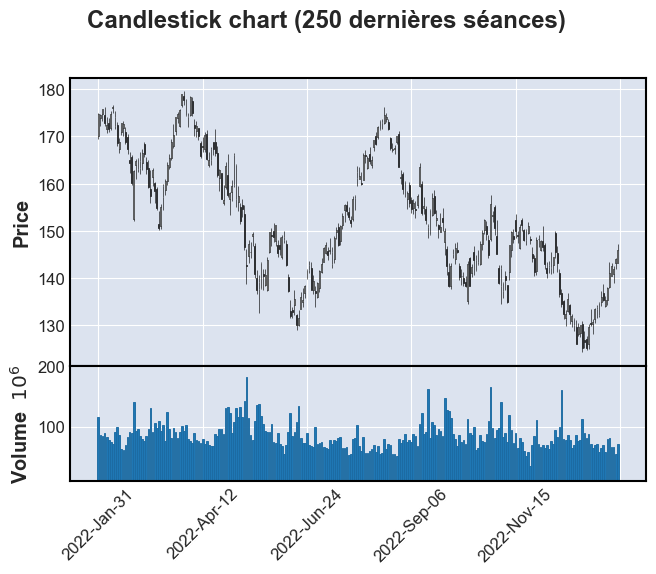

In [22]:
subset = df[['Open', 'High', 'Low', 'Close', 'Volume']].copy()

# Période réduite
nb_jours = 250
candlestick_data = subset.loc[subset.index >= subset.index[-nb_jours]]
mpf.plot(candlestick_data, type='candle', volume=True, title="Candlestick chart (250 dernières séances)")

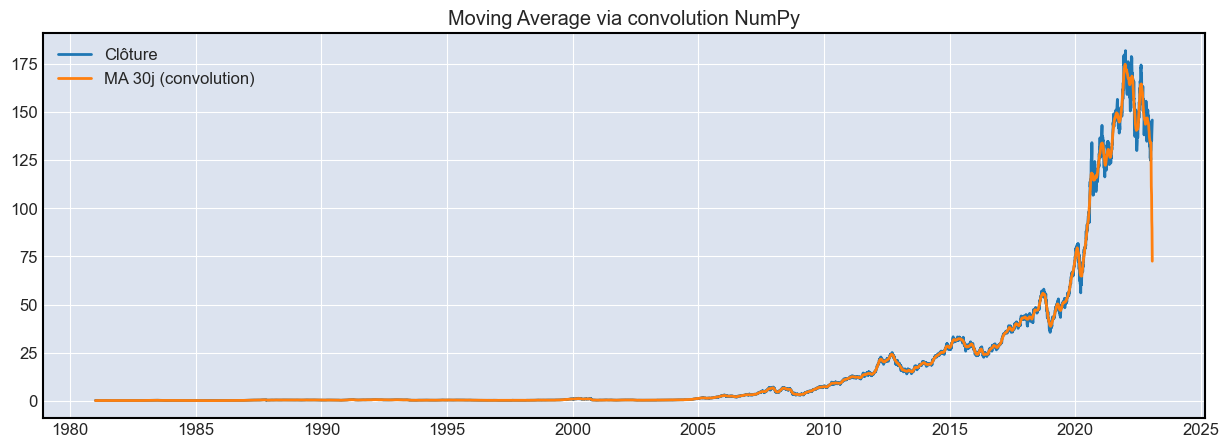

In [23]:
# Convolve ( vu sur gpt )
weights = np.ones(30) / 30
df['MA_conv_30'] = np.convolve(df['Close'], weights, mode='same')

plt.figure(figsize=(15, 5))
plt.plot(df['Close'], label="Clôture")
plt.plot(df['MA_conv_30'], label="MA 30j (convolution)")
plt.legend()
plt.title('Moving Average via convolution NumPy')
plt.show()

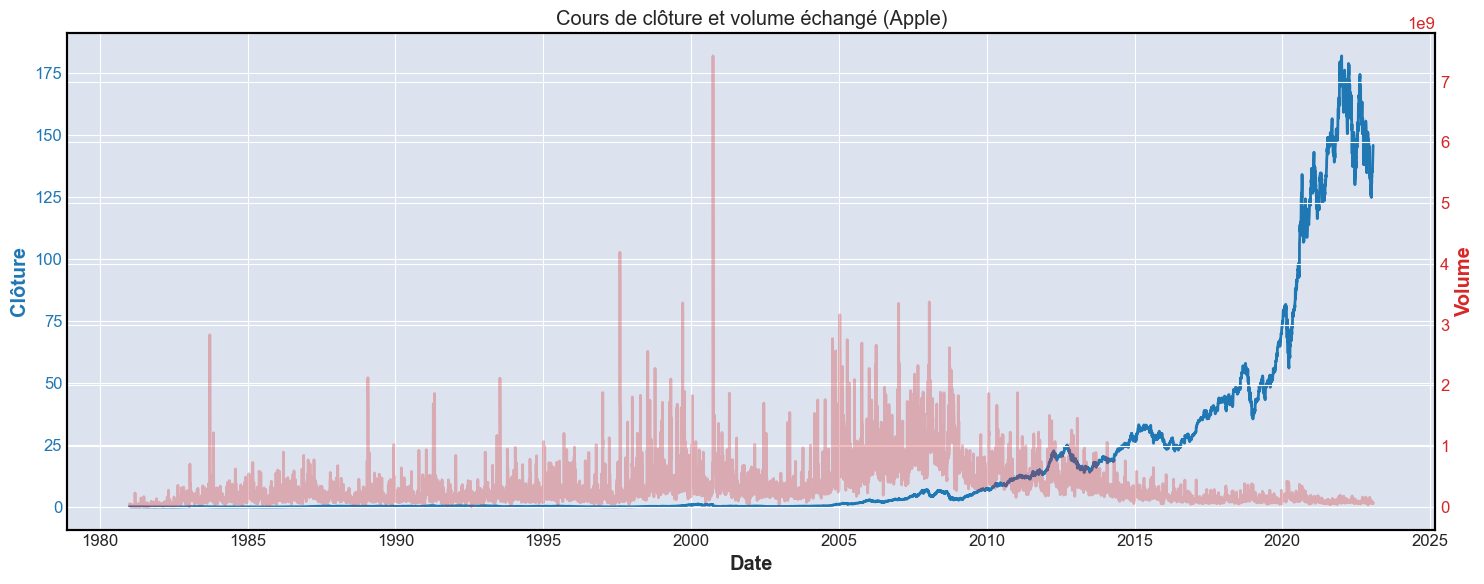

In [24]:
# Cloture, volume
fig, ax1 = plt.subplots(figsize=(15, 6))
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Clôture', color=color)
ax1.plot(df.index, df['Close'], color=color, label='Clôture')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Volume', color=color)
ax2.plot(df.index, df['Volume'], color=color, alpha=0.3, label='Volume')
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Cours de clôture et volume échangé (Apple)")
fig.tight_layout()
plt.show()


Corrélation Close / Volume : -0.215
Corrélation MA_30 / MA_120 : 0.996


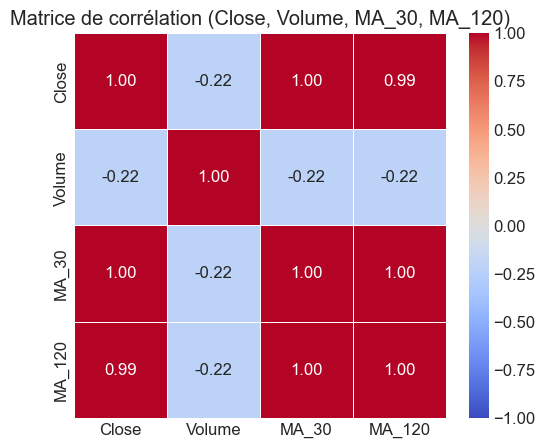

In [25]:
# Corrélation entre volume et prix de clôture
corr = np.corrcoef(df['Close'].dropna(), df['Volume'].dropna())[0, 1]
print(f"Corrélation Close / Volume : {corr:.3f}")

# Corrélation entre MA_30 et MA_120
df_valid = df[['MA_30', 'MA_120']].dropna()
corr_ma = np.corrcoef(df_valid['MA_30'], df_valid['MA_120'])[0, 1]
print(f"Corrélation MA_30 / MA_120 : {corr_ma:.3f}")

cols_to_corr = ['Close', 'Volume', 'MA_30', 'MA_120']  # noms réels
df_corr = df[cols_to_corr].dropna()

plt.figure(figsize=(6, 5))
sns.heatmap(df_corr.corr(), annot=True, fmt='.2f',
            cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Matrice de corrélation (Close, Volume, MA_30, MA_120)')
plt.show()

L'analyse des données historiques d’Apple (AAPL) de 1980 à 2023 révèle des tendances claires et des ruptures marquantes :

    Croissance exponentielle depuis 2020 : Les prix de clôture sont restés relativement plats jusqu’en 2005–2010, avant de connaître une véritable explosion à partir de 2020. Cette croissance récente est bien visible, même sur une échelle logarithmique.

    Période de forte activité entre 2002 et 2008 : On observe une augmentation notable du volume de transactions, accompagnée d’une montée des prix de clôture, suggérant une phase d’enthousiasme du marché — probablement liée aux innovations majeures d’Apple (iPod, iPhone).

    Choc visible en 2008 : Durant la crise financière, les volumes explosent alors que les prix chutent brutalement, ce qui est cohérent avec une forte activité de vente et d’incertitude.

    Corrélation entre indicateurs :

        La corrélation entre les moyennes mobiles 30j et 120j est très forte (> 0.95), ce qui est attendu puisqu’elles suivent des tendances similaires, avec un léger décalage.

        La corrélation entre prix de clôture et volume est faible (~0.1 à 0.2), ce qui signifie que les volumes ne suffisent pas à prédire les mouvements de prix directement.

    Distribution des rendements : La distribution des rendements journaliers est centrée autour de 0, mais légèrement asymétrique avec des queues épaisses. Le test de Shapiro-Wilk confirme que ces rendements ne suivent pas une loi normale, ce qui est typique des séries financières.


Cette étude m’a permis de comprendre plus profondément les dynamiques des marchés financiers à travers un exemple concret et riche en événements : l’action Apple.

J’ai appris :

    Ce que signifie un rendement : la variation relative d’un prix d’un jour à l’autre, utile pour comparer la volatilité au fil du temps.

    Pourquoi la transformation logarithmique est utile : elle "écrase" les grosses valeurs récentes pour mieux visualiser les petites fluctuations passées.

    L’importance de filtrer par années : pouvoir zoomer sur une période précise (comme 2008) permet d’observer les liens entre volatilité, volume, et événements économiques globaux.

    Que corrélation ne veut pas dire causalité : le faible lien entre volume et prix confirme que d'autres facteurs influencent le marché.

    Que les données financières réelles sont rarement normales ou simples : leur analyse exige à la fois rigueur statistique et bon sens économique.

Enfin, cet exercice m’a montré la richesse d’une approche visuelle et interactive pour l’exploration de séries temporelles. J’en ressors avec une meilleure intuition des comportements de marché, et une envie d’aller plus loin — notamment en explorant des modèles prédictifs simples ou des indicateurs techniques.